In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
data = pd.read_csv('iris.data', names=features)

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


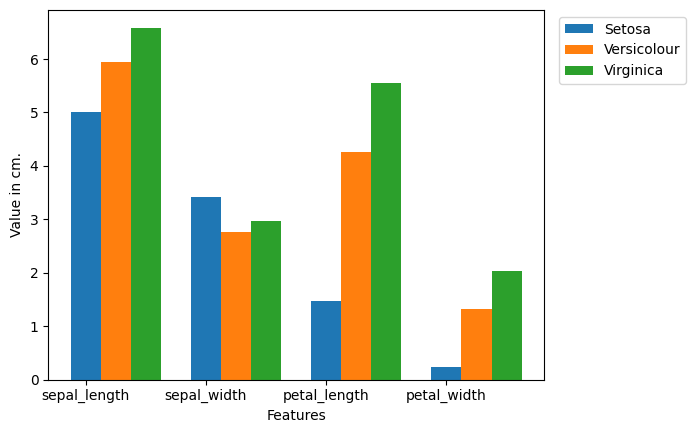

In [5]:
val = data.values
X = val[:, :4]
Y = val[:, 4]

Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1]) for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(features)-1)
width = 0.25
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, features[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()


In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [7]:
predictions = svm.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.9666666666666667
